# Aula - Regressão Logística e Métricas de avaliação - Tera
### Marcus Oliveira da Silva

* Linkedin: [marcuos](https://www.linkedin.com/in/marcuos/) (econometria, finanças, crédito, fintech e ML)
* Dataset utilizado: [Default of Credit Card Clients](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)
* Link da aula no Github: [Aqui](https://github.com/marcusos/tera-lessons/tree/main/balanceamento_datasets)
* Board da aula: [Aqui](https://miro.com/welcomeonboard/QVUxTFE5bGM5dVFzWldWSzN3V1pIYXE5STRQdXZKbW1VWDVRU0s4WXpTanJaUmhtTXlyRWJ1TlE2RGpGOElHNHwzMDc0NDU3MzU4MzQ3MTU5NzQ1fDI=?share_link_id=561442737265)


**Libs utilizadas:**
* scikit-learn
* pandas
* seaborn
* matplotlib
* lightgbm

Neste notebook, serão abordados os tema classificação binária, regressão logística e métricas de avaliação. 

Utilizaremos como exemplo o dataset "Default of Credit Card Clients" disponível no Kaggle. 

Ao final, espera-se que o aluno tenha uma noção básica de como funciona uma classificação binária, como uma regressão logística realiza predições e como fazer a avaliação de modelos de classificação binária.


## O que vamos ver hoje:
Bloco 1
- Case e contexto de negócio
- Regressão logística
- Matriz de confusão

Bloco 2
- Carregando e limpando o dataset
- EDA
- Implementação do modelo

Bloco 3
- Avaliação do modelo
- Roc curve, precision recall curve
- Tradeoff precision recall

## Contexto de negócio
O principal problema do conjunto de dados "Default of Credit Card Clients Dataset" é prever se um titular de cartão de crédito será inadimplente em seu pagamento ou não, com base em features (variáveis) sociodemográficas e financeiras, como idade, educação, valor da fatura e histórico de pagamento.

## Contexto analítico
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0 - PAY_6**: Repayment status in September-April, 2005
    * -1=pay duly, 1=payment delay for one month
    *  2=payment delay for two months, … 
    *  8=payment delay for eight months, 9=payment delay for nine months and above
* **BILL_AMT1 - BILL_AMT6**: Amount of bill statement in September-April, 2005 (NT dollar)
* **PAY_AMT0 - PAY_AMT6**: Amount of previous payment in September-April, 2005 (NT dollar)                       
* **default.payment.next.month**: Default payment (1=yes, 0=no)

## Regressão logística

![bla](imgs/logistc_regression.png "Title")

## Regressão logística

![bla](imgs/sigmoid.png "Title")

Recap classificação, Recap regressão, Vamos falar sobre Sigmoid

## Matriz de confusão
![](confusion.jpg)

![bla](imgs/confusion.jpg "Title")

## Métricas
* A acurácia/erro de classificação nem sempre são métricas certas
* A precisão é a proporção de previsões positivo que estão corretas
* Recall é proporção de dados positivos corretamente identificados pelo modelo
* Trade-off entre precision e recall é setado pelo threshold de corte (ponto de corte)

<img src="imgs/pr_recall_calc.png" alt="img" width="50%"/>

In [7]:
# TO-DO
# Exemplos práticos: Teste de Covid-19
# quando olhar precision, quando olhar recall

## Importando as bibliotecas

In [90]:
# Silent warnings
import warnings
warnings.filterwarnings("ignore")

# Core
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

from itertools import cycle

## Carregando o dataset

In [4]:
df = pd.read_csv('data/UCI_Credit_Card.csv')
df.drop('ID', axis=1, inplace=True)
df = df.rename(columns={'default.payment.next.month': 'default', 'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Verificando o tipo das variáveis

In [5]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

## Sumário do dataset

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Distribuição da variável de interesse

In [91]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [43]:
default_rate = df.default.value_counts()[1]/len(df)
print('Proporção de inadimplentes:', round(default_rate,2))

Proporção de inadimplentes: 0.22


## Checando valores faltantes

In [9]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

## Análise Exploratória

<AxesSubplot: xlabel='EDUCATION', ylabel='default'>

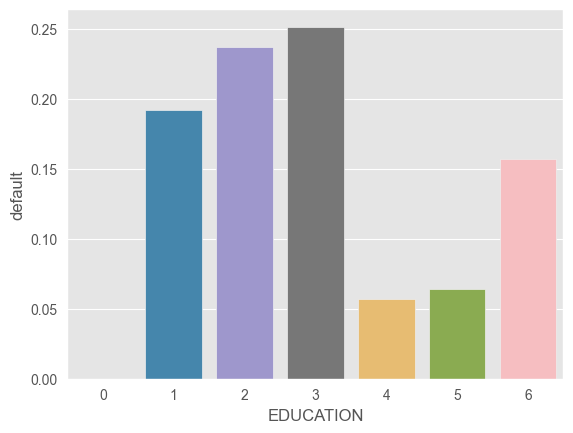

In [10]:
df_g = df.groupby(['EDUCATION'], as_index=False)['default'].mean()
sns.barplot(x="EDUCATION", y="default", data=df_g)

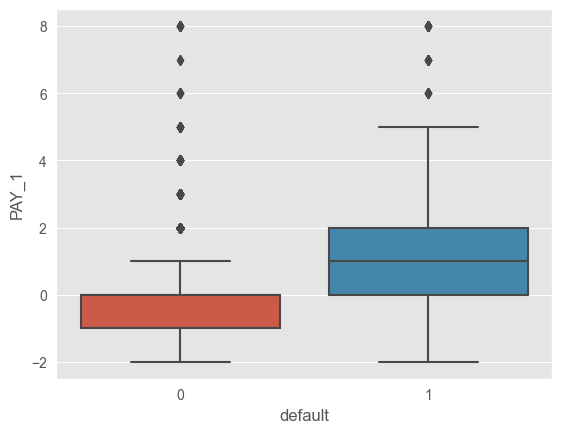

In [11]:
sns.boxplot('default', 'PAY_1', data=df)
plt.show()

<AxesSubplot: >

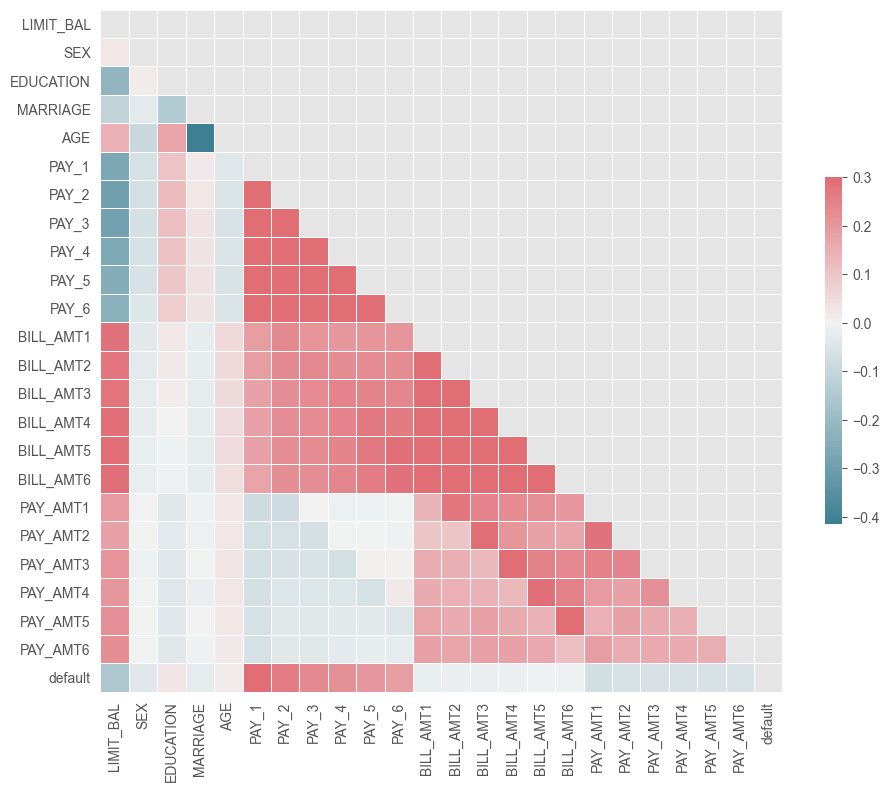

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Organizando as features

In [15]:
target = 'default'

cat_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE'
]

num_features = [
    'LIMIT_BAL','AGE',
    'PAY_1','PAY_2','PAY_3',
    'PAY_4','PAY_5','PAY_6',
    'BILL_AMT1','BILL_AMT2','BILL_AMT3',
    'BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3',
    'PAY_AMT4','PAY_AMT5','PAY_AMT6'
]

## Pré-processamento dos dados

In [16]:
df_processed = pd.get_dummies(df, columns=cat_features, dummy_na=True)

In [17]:
df_processed.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_1.0', 'SEX_2.0',
       'SEX_nan', 'EDUCATION_0.0', 'EDUCATION_1.0', 'EDUCATION_2.0',
       'EDUCATION_3.0', 'EDUCATION_4.0', 'EDUCATION_5.0', 'EDUCATION_6.0',
       'EDUCATION_nan', 'MARRIAGE_0.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'MARRIAGE_nan'],
      dtype='object')

## Splitando os dados e isolando as features de entrada e a variável de interesse

In [60]:
X = df_processed.drop('default', axis=1)
y = df_processed.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Scaling das variáveis


In [66]:
# IDADE = (x - mean)/std => mean = 0 var = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treinando o modelo

In [67]:
classifier = LogisticRegression(max_iter=2000,random_state=42)
clf = classifier.fit(X_train, y_train)

## Printando o modelo

In [62]:
clf.coef_

array([[-3.30738682e-06, -1.61734586e-02,  1.25048162e-03,
         9.92097139e-04,  8.60982780e-04,  8.24931426e-04,
         7.52179484e-04,  7.16502539e-04, -7.21687465e-06,
         2.75026887e-06,  2.45020327e-06,  8.27328481e-07,
         3.30814098e-06,  2.19779175e-06, -2.27780444e-05,
        -2.47144283e-05, -5.96496893e-06, -8.37065764e-06,
        -2.91136929e-06, -1.89314083e-06, -1.32116382e-04,
        -3.92644298e-04,  0.00000000e+00, -1.26878815e-06,
        -1.09623253e-04, -2.75459636e-04, -1.08678361e-04,
        -6.63141428e-06, -2.15020891e-05, -1.59713902e-06,
         0.00000000e+00, -4.41558895e-06, -8.94766281e-05,
        -4.25658152e-04, -5.21031050e-06,  0.00000000e+00]])

## Computando as probabilidades

In [92]:
# Obtendo as predicoes da classe de interesse, treshold 0.5
y_pred = clf.predict(X_test)

# Realizando a previsão das probabilidades do modelo_baseline
y_score = clf.predict_proba(X_test)[:,1]

print('Predição da classe: ', y_pred)
print('Predição das probabilidades', y_score)

Predição da classe:  [1 0 0 ... 0 1 0]
Predição das probabilidades [0.68234917 0.21505258 0.25672105 ... 0.27789987 0.61958703 0.06145129]


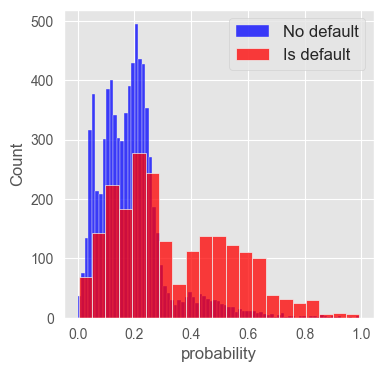

In [71]:
# Função para plotar o histograma das probabilidades preditas
def plot_probabilities_hist(y_score, y_test):
    y_result = pd.DataFrame({
        'probability':  y_score,
        'true_class': y_test,
    })
    fig, ax = plt.subplots(figsize=(4, 4))
    negative = y_result.loc[y_result.true_class == 0, 'probability']
    positive = y_result.loc[y_result.true_class == 1, 'probability']
    sns.histplot(negative, color='blue', ax=ax, label='No default')
    sns.histplot(positive, color='red', ax=ax, label='Is default')
    _ = plt.legend({"No default": negative, "Is default": positive}, fontsize="large")
    plt.show()

plot_probabilities_hist(y_score, y_test)

## Matriz de confusão

Total samples:  9900


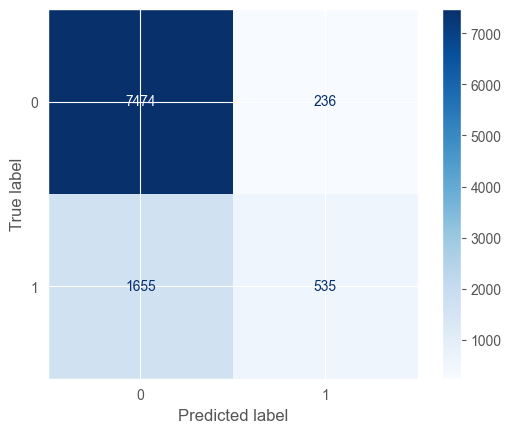

In [89]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print('Total samples: ', len(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

In [93]:
# Recall = TP/(TP+FN) # Recall -> do universo dos positivos, qual o percentual que o meu modelo consegue encontrar ()
TP = 535
FN = 1655
recall = TP/(FN + TP)
print(recall)

0.24429223744292236


In [94]:
# Precision = TP/(TP + FP)
TP = 535
FN = 236
precision = TP/(FN + TP)
print(precision)

0.6939040207522698


Vamos calcular na mão a acurácia.

*Dinâmica*: Qual é o recall desse modelo?

## Métricas de avaliação do modelo

In [95]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.808989898989899
Precision: 0.6939040207522698
Recall: 0.24429223744292236
F1-Score: 0.3613644039175954


*Questionamento:* em um teste de gravidez você quer mais precision ou mais recall ?

## ROC Curve

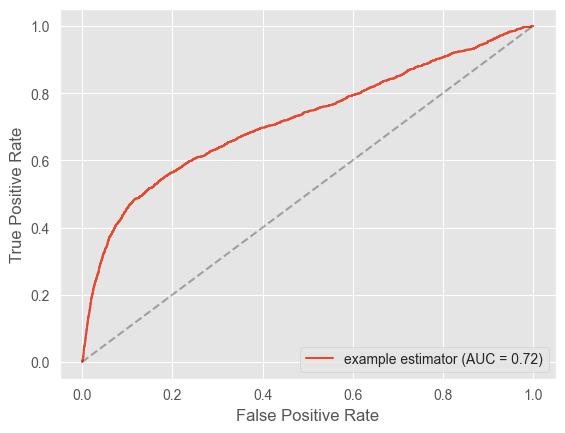

In [56]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistc')
display.plot()

plt.plot(np.linspace(0, 1, 21), np.linspace(0, 1, 21), linestyle='--', label='No Skill', color='black', alpha=0.3)
plt.show()

ROC-Curve
* Usada para avaliar a performance das probabilidades preditas, sem necessariamente definir um ponto de corte
* AUC: área embaixo da curva, quanto maior melhor
* Comumente usada em datasets balanceados 
* vídeo sobre ROC-AUC: https://www.youtube.com/watch?v=4jRBRDbJemM

## Precision Recall Curve (datasets desbalanceados)

## Entendendo o Precision e o Recall

<img src="imgs/classes_vs_score_classifcador.png" alt="Undersampling vs Oversampling" width="600"/>

* [Dica: Animação explicando o tradeoff do precisio/recall](https://sinyi-chou.github.io/classification-auc/)
* [Dica: Animação mostrando sensibilidade curva do PR em dados desbalanceados](https://github.com/dariyasydykova/open_projects/tree/master/ROC_animation)
* [Dica: Animação mostrando o classificador perfeito e um classificador sem skill](https://arize.com/blog/what-is-pr-auc/)

## A curva do Precision vs Recall - criada a partir de diferentes threshold
<img src="imgs/pr_curve_tresholds.png" alt="" width="800"/>

[Fonte](https://www.coursera.org/specializations/machine-learning)

## A curva do Precision vs Recall - criada a partir de diferentes threshold
<img src="imgs/pr_curve_tresholds.png" alt="" width="800"/>

[Fonte](https://www.coursera.org/specializations/machine-learning)

## Plotando a PR curve do nosso modelo de probabilidade de default

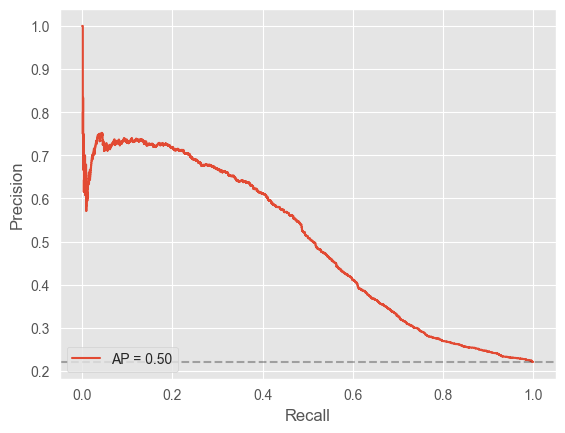

In [88]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
avg_precision = metrics.average_precision_score(y_test, y_score)
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=avg_precision)
disp.plot()
plt.axhline(default_rate, linestyle='--', color='black', alpha=0.3)
plt.show()

Precision Recall Curve
* Usada para avaliar a performance das probabilidades preditas, 
* Comumente usada em datasets balanceados 
* Foco na classe positiva
* Trade-off entre o precision e o recall, pessimista versus otimista
* Avarage Precision: quanto maior melhor (equivalante a área de baixo da curva)
* vídeo sobre ROC-AUC: https://www.youtube.com/watch?v=4jRBRDbJemM

## Tradeoff Precision vs Recall

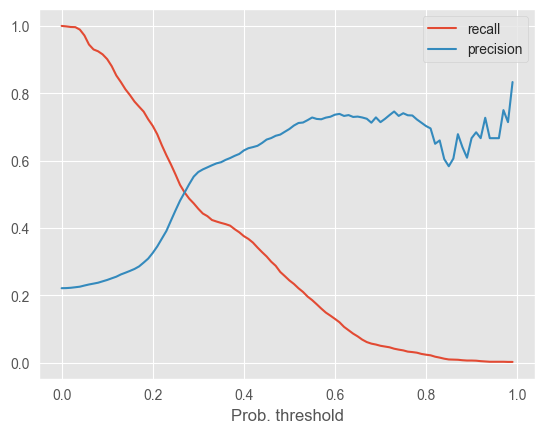

In [58]:
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (clf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
plt.xlabel('Prob. threshold')
plt.show()

*Questionamento:* qual é o melhor treshold?

## Tradeoff Precision vs Recall

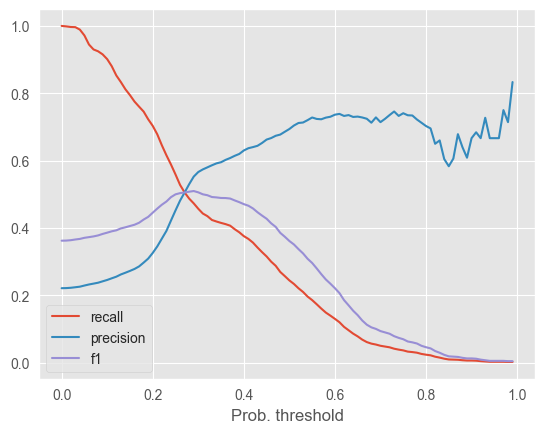

In [59]:
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.show()

## Retomando o Case (risco de crédito)

E se o CFO pedir um modelo que consiga indetificar pelo menos 50% dos inadimplentes (ou seja o modelo precisa de um recall de pelo menos 50%)

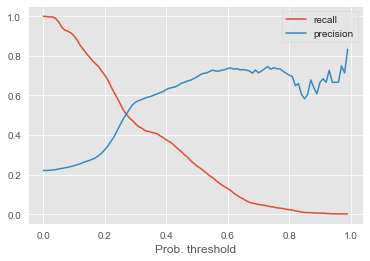

In [28]:
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
plt.xlabel('Prob. threshold')
plt.show()

In [99]:
y_hat = (clf.predict_proba(X_test)[:,1] >= 0.2).astype(bool)
y_hat  

array([ True,  True,  True, ...,  True,  True, False])

In [100]:
print('Accuracy:', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat))
print('Recall:', recall_score(y_test, y_hat))
print('F1-Score:', f1_score(y_test, y_hat))


Accuracy: 0.6126262626262626
Precision: 0.32592592592592595
Recall: 0.7031963470319634
F1-Score: 0.4454085321764281


In [102]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [104]:
y_pred_lgbm = lgbm.predict(X_test)
y_pred_lgbm

array([1, 0, 0, ..., 0, 1, 0])

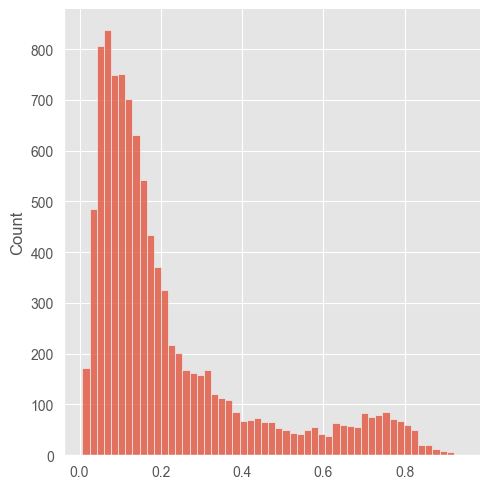

In [105]:
y_score_lgbm = lgbm.predict_proba(X_test)[:,1]
sns.displot(y_score_lgbm)

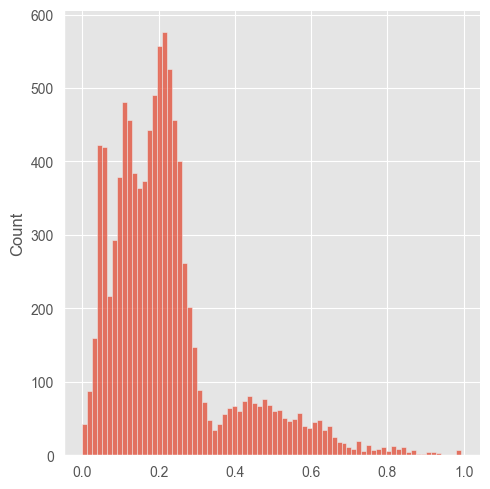

In [106]:
sns.displot(y_score)

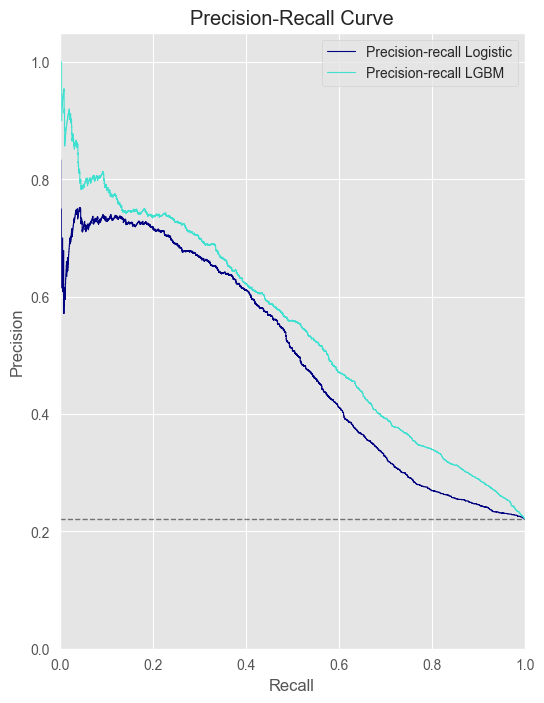

      Model  Avg. Precision
1      LGBM        0.546923
0  Logistic        0.496089


In [110]:
# Lista dos modelos
models = [clf, lgbm]

# Nome dos modelos
models_labels = ['Logistic', 'LGBM']

# Função usada para plotar a curva do Precision-Recall e para retornar o Avg. Precision (AUC), recebendo como input os modelos treinandos e nome desses modelos (labels)
def plot_precision_recall_curve(models, labels):
    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])
    avg_precisions = []
    _, ax = plt.subplots(figsize=(6, 8))

    # Para cada modelo plotar a curva do Precision-Recall
    for model, label, color in zip(models, labels, colors):
        # Retornando a probabilidade de pertencer a classe 1 (default)
        y_score = model.predict_proba(X_test)[:,1]

        # Computando as métricas
        precision,recall,_ = metrics.precision_recall_curve(y_test, y_score)
        avg_precision = metrics.average_precision_score(y_test, y_score)
        avg_precisions.append(avg_precision)

        display = PrecisionRecallDisplay(
            recall=recall,
            precision=precision,
            #average_precision=avg_precision,
        )
        display.plot(ax=ax, name=f"Precision-recall {label}", color=color, linewidth=0.8)


    handles, labels = display.ax_.get_legend_handles_labels()
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    plt.axhline(default_rate, linestyle='--', color='black', alpha=0.5, linewidth=1)

    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall Curve")

    result = pd.DataFrame({
        'Model': models_labels,
        'Avg. Precision': avg_precisions
    })

    plt.show()
    return result.sort_values(by='Avg. Precision', ascending=False)

result = plot_precision_recall_curve(models, models_labels)
print(result)


## BONUS - Comparando diferentes modelos


In [80]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

### A curva do Precision vs Recall - Comparando classificadores
<img src="imgs/pr_acurve_better_a_b.png" alt="Undersampling vs Oversampling" width="700"/>

[Fonte](https://www.coursera.org/specializations/machine-learning)

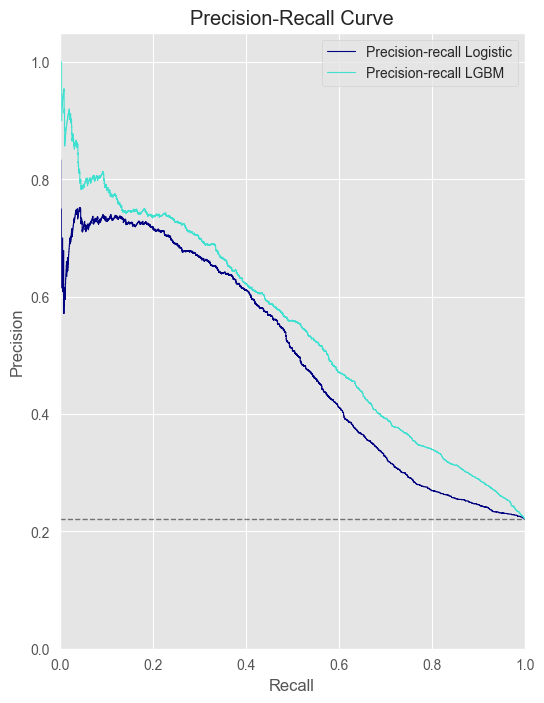

      Model  Avg. Precision
1      LGBM        0.546923
0  Logistic        0.496089


In [85]:
# Lista dos modelos
models = [clf, lgbm]

# Nome dos modelos
models_labels = ['Logistic', 'LGBM']

# Função usada para plotar a curva do Precision-Recall e para retornar o Avg. Precision (AUC), recebendo como input os modelos treinandos e nome desses modelos (labels)
def plot_precision_recall_curve(models, labels):
    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])
    avg_precisions = []
    _, ax = plt.subplots(figsize=(6, 8))

    # Para cada modelo plotar a curva do Precision-Recall
    for model, label, color in zip(models, labels, colors):
        # Retornando a probabilidade de pertencer a classe 1 (default)
        y_score = model.predict_proba(X_test)[:,1]

        # Computando as métricas
        precision,recall,_ = metrics.precision_recall_curve(y_test, y_score)
        avg_precision = metrics.average_precision_score(y_test, y_score)
        avg_precisions.append(avg_precision)

        display = PrecisionRecallDisplay(
            recall=recall,
            precision=precision,
            #average_precision=avg_precision,
        )
        display.plot(ax=ax, name=f"Precision-recall {label}", color=color, linewidth=0.8)


    handles, labels = display.ax_.get_legend_handles_labels()
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    plt.axhline(default_rate, linestyle='--', color='black', alpha=0.5, linewidth=1)

    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall Curve")

    result = pd.DataFrame({
        'Model': models_labels,
        'Avg. Precision': avg_precisions
    })

    plt.show()
    return result.sort_values(by='Avg. Precision', ascending=False)

result = plot_precision_recall_curve(models, models_labels)
print(result)

## Classificação binária (summary)

<img src="imgs/metricas_avaliacao.png" alt=""/>

## Fim